In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [5]:
data =pd.read_csv('Dataset\sales data\Sales_April_2019.csv')
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,4/19/2019 8:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,4/7/2019 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,4/30/2019 9:27,"333 8th St, Los Angeles, CA 90001"


In [14]:
os.chdir('C:\\Users\\Mohand\\Dataset\\sales data')
all_data=pd.DataFrame()
for file in os.listdir(os.getcwd()):
    if file.endswith('.csv'):
        all_data=all_data.append(pd.read_csv(file))
all_data.to_csv('all_data.csv')

In [17]:
all_data.shape

(186849, 6)

In [16]:
all_data.isna().sum()




Order ID            544
Product             544
Quantity Ordered    544
Price Each          544
Order Date          544
Purchase Address    544
dtype: int64

Clean the Data



In [18]:
all_data = all_data.dropna(how='all')
all_data.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [19]:
all_data = all_data[all_data['Order Date']!='Order Date']


In [20]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])


In [21]:
all_data.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int64  
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.9+ MB


In [22]:
all_data['Month'] =pd.to_datetime(all_data['Order Date']).dt.month
all_data.sample(10)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
11641,221027,Apple Airpods Headphones,1,150.00,06/22/19 18:40,"628 8th St, San Francisco, CA 94016",6
6502,254383,27in FHD Monitor,1,149.99,09/30/19 07:58,"914 Pine St, Boston, MA 02215",9
1001,177510,Bose SoundSport Headphones,1,99.99,4/15/2019 9:51,"182 Main St, San Francisco, CA 94016",4
11559,247725,20in Monitor,1,109.99,08/01/19 12:58,"270 12th St, Seattle, WA 98101",8
2851,143939,Lightning Charging Cable,1,14.95,01/28/19 13:07,"361 Lincoln St, Los Angeles, CA 90001",1
4558,263701,USB-C Charging Cable,1,11.95,10/30/19 17:53,"534 Jefferson St, San Francisco, CA 94016",10
16544,294602,Lightning Charging Cable,1,14.95,11/04/19 20:45,"395 Elm St, New York City, NY 10001",11
5389,199219,Wired Headphones,1,11.99,05/07/19 21:46,"394 Forest St, Austin, TX 73301",5
739,177259,34in Ultrawide Monitor,1,379.99,4/8/2019 13:36,"176 Hill St, New York City, NY 10001",4
3283,226051,Wired Headphones,1,11.99,07/28/19 21:20,"871 2nd St, Austin, TX 73301",7


split City with regex pattern https://stackoverflow.com/questions/65284133/how-to-apply-split-string-operation-on-address-column-in-python

In [23]:
s = all_data['Purchase Address'].str.extract(r'\s([^,]+),\s([A-Z]+)\s\d+$')
all_data['City'] = s[0] + '(' + s[1] + ')'
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City
0,176558,USB-C Charging Cable,2,11.95,4/19/2019 8:46,"917 1st St, Dallas, TX 75001",4,Dallas(TX)
1,176559,Bose SoundSport Headphones,1,99.99,4/7/2019 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston(MA)
2,176560,Google Phone,1,600.00,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles(CA)
3,176560,Wired Headphones,1,11.99,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles(CA)
4,176561,Wired Headphones,1,11.99,4/30/2019 9:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles(CA)
...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,Los Angeles(CA)
11682,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,San Francisco(CA)
11683,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,San Francisco(CA)
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,San Francisco(CA)


Data Exploration

Question 1: What was the best month for sales? How much was earned that month?

create Sales column

In [24]:
all_data['Sales']=all_data['Quantity Ordered']*all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales
0,176558,USB-C Charging Cable,2,11.95,4/19/2019 8:46,"917 1st St, Dallas, TX 75001",4,Dallas(TX),23.90
1,176559,Bose SoundSport Headphones,1,99.99,4/7/2019 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston(MA),99.99
2,176560,Google Phone,1,600.00,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles(CA),600.00
3,176560,Wired Headphones,1,11.99,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles(CA),11.99
4,176561,Wired Headphones,1,11.99,4/30/2019 9:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles(CA),11.99


In [25]:
all_data.groupby(['Month']).sum()

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.152607e+06
6,15253,2.562026e+06,2.577802e+06
7,16072,2.632540e+06,2.647776e+06
8,13448,2.230345e+06,2.244468e+06
9,13109,2.084992e+06,2.097560e+06


<AxesSubplot:xlabel='Month'>

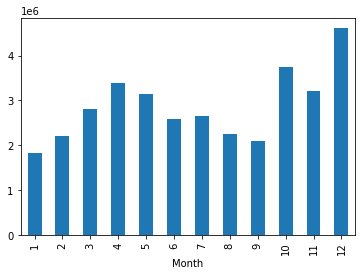

In [28]:
all_data.groupby(['Month']).sum()['Sales'].plot.bar()


Question 2: What city sold the most product?


In [35]:
all_data.groupby(['City']).sum()['Sales']

City
Atlanta(GA)          2.795499e+06
Austin(TX)           1.819582e+06
Boston(MA)           3.661642e+06
Dallas(TX)           2.767975e+06
Los Angeles(CA)      5.452571e+06
New York City(NY)    4.664317e+06
Portland(ME)         4.497583e+05
Portland(OR)         1.870732e+06
San Francisco(CA)    8.262204e+06
Seattle(WA)          2.747755e+06
Name: Sales, dtype: float64

Text(0.5, 0, 'Month number')

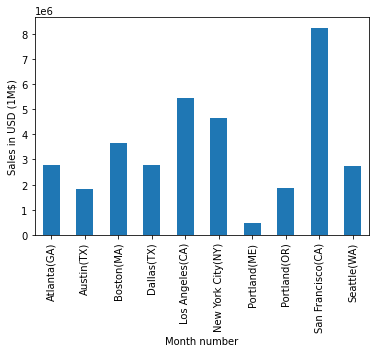

In [37]:
all_data.groupby(['City']).sum()['Sales'].plot.bar()
plt.ylabel('Sales in USD (1M$)')
plt.xlabel('Month number')


Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [40]:
all_data['Hour'] =pd.to_datetime(all_data['Order Date']).dt.hour
all_data['Minute'] =pd.to_datetime(all_data['Order Date']).dt.minute
all_data['Count'] = 1
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,4/19/2019 8:46,"917 1st St, Dallas, TX 75001",4,Dallas(TX),23.90,8,46,1
1,176559,Bose SoundSport Headphones,1,99.99,4/7/2019 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston(MA),99.99,22,30,1
2,176560,Google Phone,1,600.00,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles(CA),600.00,14,38,1
3,176560,Wired Headphones,1,11.99,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles(CA),11.99,14,38,1
4,176561,Wired Headphones,1,11.99,4/30/2019 9:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles(CA),11.99,9,27,1


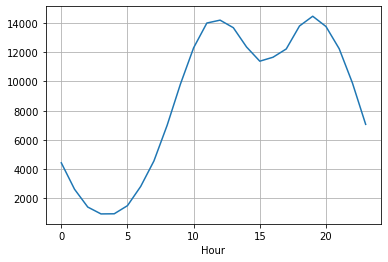

In [47]:
all_data.groupby(['Hour']).sum()['Quantity Ordered'].plot()
plt.grid()


In [57]:
all_data.groupby(['Hour']).sum().sort_values(by=['Quantity Ordered'], ascending=False).head(24)


,Quantity Ordered,Price Each,Month,Sales,Minute,Count
Hour,,,,,,
19,14470,2398588.31,91389,2412938.54,381042,12905
12,14202,2299876.68,89161,2316821.34,368679,12587
11,14005,2288855.18,87654,2300610.24,368952,12411
18,13802,2207696.93,86421,2219348.30,371688,12280
20,13768,2268185.16,86375,2281716.24,354086,12228
13,13685,2139743.86,85808,2155389.80,351045,12129
14,12362,2072194.77,77836,2083672.73,322563,10984
10,12308,1932665.62,76928,1944286.77,331941,10944
21,12244,2030763.83,77103,2042000.86,312062,10921


Question 4: What products are most often sold together?

In [59]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,4/19/2019 8:46,"917 1st St, Dallas, TX 75001",4,Dallas(TX),23.90,8,46,1
1,176559,Bose SoundSport Headphones,1,99.99,4/7/2019 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston(MA),99.99,22,30,1
2,176560,Google Phone,1,600.00,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles(CA),600.00,14,38,1
3,176560,Wired Headphones,1,11.99,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles(CA),11.99,14,38,1
4,176561,Wired Headphones,1,11.99,4/30/2019 9:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles(CA),11.99,9,27,1
